In [2]:
import os
import zipfile 
import pandas as pd
import sklearn.metrics
import sklearn.preprocessing
import matplotlib.pyplot as plt
import tensorflow.keras as keras


In [3]:
from zipfile import ZipFile
import os

# uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
# zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
# zip_file = ZipFile(zip_path)
# zip_file.extractall()
# csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

13568290/13568290 [==============================] - 5s 0us/step


In [4]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


# Preprocessing the Dataset


In [5]:
df[["Date","Time"]]= df["Date Time"].str.split(" ", expand=True)
df=df.drop("Date Time", axis=1)
df=df[df["Time"]=="12:00:00"]
df=df.drop("Time",axis=1)
df=df.set_index("Date")
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date,,,,,,,,,,,,,,
01.01.2009,1000.30,-6.87,266.27,-8.28,89.6,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.40
02.01.2009,998.91,-3.12,270.13,-4.50,90.1,4.85,4.37,0.48,2.73,4.38,1286.47,1.54,2.00,127.00
03.01.2009,999.02,-5.96,267.28,-8.72,80.7,3.91,3.16,0.75,1.97,3.16,1300.90,1.31,1.88,213.90
04.01.2009,988.94,-1.21,272.82,-2.36,91.8,5.59,5.13,0.46,3.23,5.19,1264.30,1.99,3.88,225.80
05.01.2009,990.42,-3.65,270.26,-5.54,86.6,4.66,4.04,0.62,2.54,4.08,1278.21,5.49,8.38,17.44


In [9]:
df["target"]= df["T (degC)"].shift(-1)
df=df.drop(df.tail(1).index)
df.drop("Tpot (K)", axis =1, inplace=True)
df.head()


,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),target
Date,,,,,,,,,,,,,,
01.01.2009,1000.30,-6.87,-8.28,89.6,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.40,-3.12
02.01.2009,998.91,-3.12,-4.50,90.1,4.85,4.37,0.48,2.73,4.38,1286.47,1.54,2.00,127.00,-5.96
03.01.2009,999.02,-5.96,-8.72,80.7,3.91,3.16,0.75,1.97,3.16,1300.90,1.31,1.88,213.90,-1.21
04.01.2009,988.94,-1.21,-2.36,91.8,5.59,5.13,0.46,3.23,5.19,1264.30,1.99,3.88,225.80,-3.65
05.01.2009,990.42,-3.65,-5.54,86.6,4.66,4.04,0.62,2.54,4.08,1278.21,5.49,8.38,17.44,-14.52


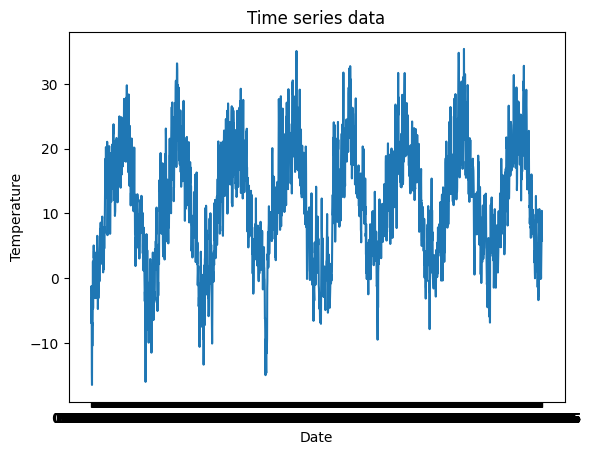

In [10]:
import matplotlib.pyplot as plt

# Sample data
x = df.index
y = df["T (degC)"]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(x, y)

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('Time series data')

# Show the plot
plt.show()


In [11]:
train_start_index=0
validation_start_index=int(df.shape[0]* 0.70)
test_start_index=int(df.shape[0]*0.85)

df_train=df.iloc[train_start_index:validation_start_index]
df_validation=df.iloc[validation_start_index:test_start_index]
df_test=df.iloc[test_start_index:]

x_train= df_train.drop("target", axis=1)
x_validation=df_validation.drop("target", axis=1)
x_test= df_test.drop("target",axis=1)

y_train= df_train["target"]
y_validation= df_validation["target"]
y_test=df_test["target"]

print("Train size: ", x_train.shape, y_train.shape)
print("Validation size", x_validation.shape, y_validation.shape)
print("Test size: ",x_test.shape, y_test.shape)

Train size:  (2041, 13) (2041,)
Validation size (438, 13) (438,)
Test size:  (438, 13) (438,)



# Standardizing Features 

In [12]:
scaler=sklearn.preprocessing.StandardScaler()

In [13]:
x_train=scaler.fit_transform(x_train)
x_validation=scaler.transform(x_validation)
x_test= scaler.transform(x_test)

# Creating Sequence

In [14]:
SEQUENCE_LENGTH=10
BATCH_SIZE=250

In [16]:
dataset_train= keras.preprocessing.timeseries_dataset_from_array(x_train,y_train,
                                                     sequence_length=SEQUENCE_LENGTH,
                                                     batch_size=BATCH_SIZE,)

In [17]:
dataset_validation= keras.preprocessing.timeseries_dataset_from_array(x_validation,y_validation,
                                                     sequence_length=SEQUENCE_LENGTH,
                                                     batch_size=BATCH_SIZE,)

In [18]:
dataset_test= keras.preprocessing.timeseries_dataset_from_array(x_test,y_test, sequence_length=SEQUENCE_LENGTH,
                                                               batch_size=BATCH_SIZE)

# Building the model

In [20]:
for batch in dataset_train.take(1):
    input, targets=batch
input_shape =input.shape[1:]    

In [21]:
model=keras.models.Sequential()
model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5888      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,921
Trainable params: 5,921
Non-trainable params: 0
_________________________________________________________________


In [25]:
EPOCHS=500
es_callback=keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0,patience=20)
model.fit(dataset_train,epochs=EPOCHS, validation_data=dataset_validation,shuffle=False, callbacks=[es_callback])

Epoch 1/500
9/9 [==============================] - 6s 181ms/step - loss: 201.9100 - val_loss: 230.3785
Epoch 2/500
9/9 [==============================] - 0s 50ms/step - loss: 191.7904 - val_loss: 217.7450
Epoch 3/500
9/9 [==============================] - 0s 47ms/step - loss: 180.4192 - val_loss: 202.7877
Epoch 4/500
9/9 [==============================] - 0s 49ms/step - loss: 166.9460 - val_loss: 185.1394
Epoch 5/500
9/9 [==============================] - 0s 48ms/step - loss: 151.7282 - val_loss: 165.9658
Epoch 6/500
9/9 [==============================] - 0s 53ms/step - loss: 136.0098 - val_loss: 147.5186
Epoch 7/500
9/9 [==============================] - 0s 54ms/step - loss: 121.1046 - val_loss: 131.2863
Epoch 8/500
9/9 [==============================] - 0s 50ms/step - loss: 107.6893 - val_loss: 117.5378
Epoch 9/500
9/9 [==============================] - 0s 49ms/step - loss: 95.7389 - val_loss: 105.5496
Epoch 10/500
9/9 [==============================] - 0s 47ms/step - loss: 84.9232 -

9/9 [==============================] - 0s 51ms/step - loss: 7.5867 - val_loss: 10.1950
Epoch 83/500
9/9 [==============================] - 0s 52ms/step - loss: 7.4445 - val_loss: 10.0122
Epoch 84/500
9/9 [==============================] - 0s 50ms/step - loss: 7.3740 - val_loss: 9.8955
Epoch 85/500
9/9 [==============================] - 0s 49ms/step - loss: 7.2212 - val_loss: 9.7618
Epoch 86/500
9/9 [==============================] - 0s 51ms/step - loss: 7.2256 - val_loss: 9.7118
Epoch 87/500
9/9 [==============================] - 0s 50ms/step - loss: 7.0667 - val_loss: 9.5211
Epoch 88/500
9/9 [==============================] - 0s 50ms/step - loss: 6.9823 - val_loss: 9.4105
Epoch 89/500
9/9 [==============================] - 0s 47ms/step - loss: 6.9443 - val_loss: 9.3178
Epoch 90/500
9/9 [==============================] - 0s 49ms/step - loss: 6.7885 - val_loss: 9.1747
Epoch 91/500
9/9 [==============================] - 0s 49ms/step - loss: 6.7671 - val_loss: 9.0902
Epoch 92/500
9/9 [===

9/9 [==============================] - 0s 50ms/step - loss: 3.0116 - val_loss: 6.1597
Epoch 165/500
9/9 [==============================] - 0s 51ms/step - loss: 2.9987 - val_loss: 6.1208
Epoch 166/500
9/9 [==============================] - 0s 44ms/step - loss: 2.9982 - val_loss: 6.1216
Epoch 167/500
9/9 [==============================] - 0s 49ms/step - loss: 2.9921 - val_loss: 6.1614
Epoch 168/500
9/9 [==============================] - 0s 50ms/step - loss: 2.9711 - val_loss: 6.1780
Epoch 169/500
9/9 [==============================] - 0s 49ms/step - loss: 2.9310 - val_loss: 6.1698
Epoch 170/500
9/9 [==============================] - 0s 47ms/step - loss: 2.8891 - val_loss: 6.0707
Epoch 171/500
9/9 [==============================] - 0s 48ms/step - loss: 2.8377 - val_loss: 6.0411
Epoch 172/500
9/9 [==============================] - 0s 50ms/step - loss: 2.8017 - val_loss: 6.0039
Epoch 173/500
9/9 [==============================] - 0s 50ms/step - loss: 2.7645 - val_loss: 5.9680
Epoch 174/500


9/9 [==============================] - 0s 46ms/step - loss: 1.3669 - val_loss: 3.5379
Epoch 247/500
9/9 [==============================] - 0s 50ms/step - loss: 1.3504 - val_loss: 3.4577
Epoch 248/500
9/9 [==============================] - 0s 49ms/step - loss: 1.3340 - val_loss: 3.4418
Epoch 249/500
9/9 [==============================] - 0s 50ms/step - loss: 1.3180 - val_loss: 3.4237
Epoch 250/500
9/9 [==============================] - 0s 48ms/step - loss: 1.3023 - val_loss: 3.4057
Epoch 251/500
9/9 [==============================] - 0s 52ms/step - loss: 1.2867 - val_loss: 3.3884
Epoch 252/500
9/9 [==============================] - 0s 46ms/step - loss: 1.2705 - val_loss: 3.3701
Epoch 253/500
9/9 [==============================] - 0s 53ms/step - loss: 1.2559 - val_loss: 3.3551
Epoch 254/500
9/9 [==============================] - 0s 55ms/step - loss: 1.2385 - val_loss: 3.3362
Epoch 255/500
9/9 [==============================] - 0s 49ms/step - loss: 1.2519 - val_loss: 3.3986
Epoch 256/500


In [29]:
actual=[]
predicted=[]
for x, y in dataset_test:
    actual+=y.numpy().tolist()
    p= model.predict(x)
    predicted+=p.reshape(p.shape[0]).tolist()
    
sklearn.metrics.r2_score(actual, predicted)    

6/6 [==============================] - 0s 6ms/step


0.9904300642749081